In [3]:
# Get basic statistics about the optimization run
print(f"Total number of evaluations: {len(df)}")
print(f"Number of generations: {df['gen'].max() + 1}")
print("\nParameter ranges found:")
for param in ['learning_rate', 'num_hidden_layers', 'neurons_per_layer', 'batch_size', 'learning_decay_steps']:
    print(f"{param}:")
    print(f"  Min: {df['params'].apply(lambda x: x[param]).min():.6f}")
    print(f"  Max: {df['params'].apply(lambda x: x[param]).max():.6f}")

# Find the best solutions based on different fitness metrics
print("\nBest solutions:")
for i in range(3):
    best_idx = df['fitness'].apply(lambda x: x[i]).idxmin()
    print(f"\nBest for fitness metric {i}:")
    print(f"Generation: {df.loc[best_idx, 'gen']}")
    print(f"Parameters: {df.loc[best_idx, 'params']}")
    print(f"Fitness values: {df.loc[best_idx, 'fitness']}")

Total number of evaluations: 820
Number of generations: 41

Parameter ranges found:
learning_rate:
  Min: 0.001186
  Max: 0.009896
num_hidden_layers:
  Min: 1.000000
  Max: 12.000000
neurons_per_layer:
  Min: 28.000000
  Max: 450.000000
batch_size:
  Min: 48.000000
  Max: 1993.000000
learning_decay_steps:
  Min: 105.000000
  Max: 961.000000

Best solutions:

Best for fitness metric 0:
Generation: 0
Parameters: {'learning_rate': 0.009896281171302293, 'num_hidden_layers': 8, 'neurons_per_layer': 292, 'batch_size': 1412, 'learning_decay_steps': 858}
Fitness values: [4.813353061676025, 424.4532172679901, 6052.21142578125]

Best for fitness metric 1:
Generation: 24
Parameters: {'learning_rate': 0.003783462927424995, 'num_hidden_layers': 11, 'neurons_per_layer': 63, 'batch_size': 1760, 'learning_decay_steps': 643}
Fitness values: [15.045298013794287, -1801916.091927944, 6190.074512267381]

Best for fitness metric 2:
Generation: 32
Parameters: {'learning_rate': 0.006077411374207937, 'num_hidd

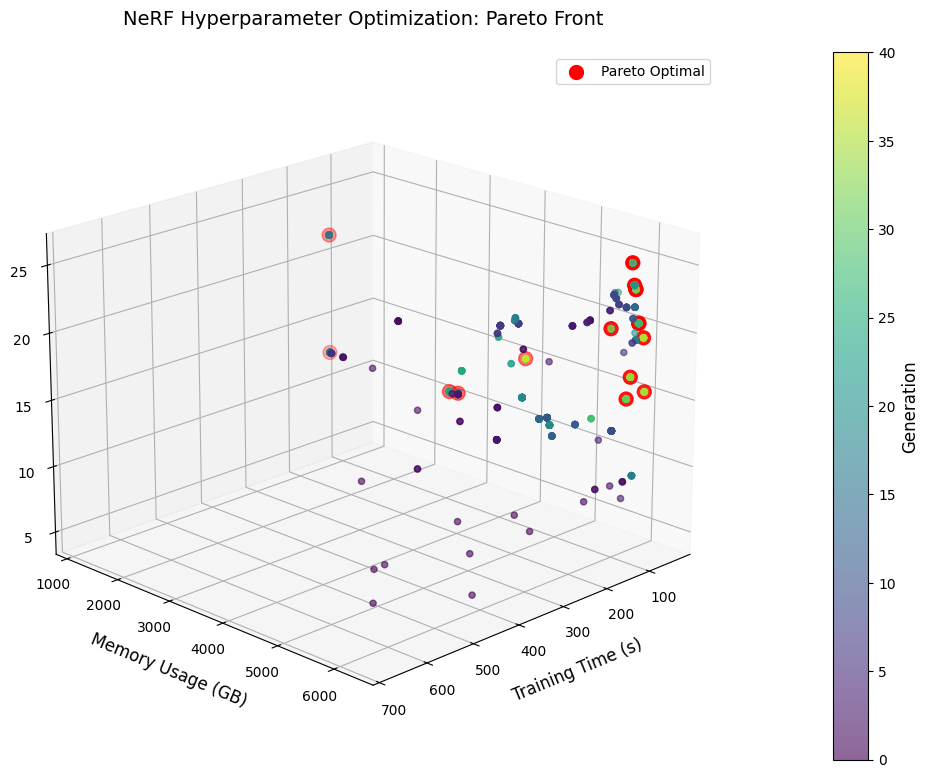

In [ ]:
# Create single optimized 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all solutions
scatter = ax.scatter(df['time'], 
                    df['memory'], 
                    df['psnr'],
                    c=df['generation'],
                    cmap='viridis',
                    alpha=0.6)

# Highlight Pareto-optimal points
ax.scatter(df.loc[pareto_optimal, 'time'],
          df.loc[pareto_optimal, 'memory'],
          df.loc[pareto_optimal, 'psnr'],
          c='red',
          s=100,
          label='Pareto Optimal')

# Customize the plot
ax.set_xlabel('Training Time (s)', fontsize=12)
ax.set_ylabel('Memory Usage (GB)', fontsize=12)
ax.set_zlabel('PSNR (dB)', fontsize=12)
ax.set_title('NeRF Hyperparameter Optimization: Pareto Front', fontsize=14)

# Set optimal viewing angle
ax.view_init(elev=20, azim=45)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Generation', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Adjust layout
plt.tight_layout()

plt.show()